In [18]:
import model
import pandas as pd

In [19]:
scenario = model.CounterterrorismModel(N=200, height=3,width=4,prob_violence=0.001,policy='CONC',reactive_lvl='none',discontent='mid')
for i in range(700):
    scenario.step()

current id pre-IsraeliGovt 200


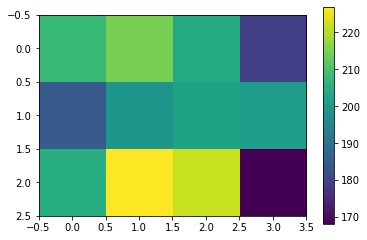

In [20]:
import numpy as np
import matplotlib.pyplot as plt

agent_counts = np.zeros((scenario.grid.width, scenario.grid.height))
for cell in scenario.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count

plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

<AxesSubplot:>

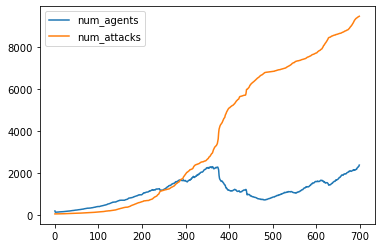

In [22]:
model_df = scenario.datacollector.get_model_vars_dataframe()
model_df.plot()

In [10]:
model_df

,num_agents,num_attacks
0,150,37
1,117,38
2,121,39
3,121,39
4,126,41
...,...,...
95,252,121
96,255,124
97,252,124
98,252,124


In [21]:
agents_df = scenario.datacollector.get_agent_vars_dataframe()
agents_df

status     loc
Step AgentID                       
1    1              neutral  (0, 3)
     2        anti-violence  (1, 1)
     3            combatant  (0, 0)
     4          sympathetic  (2, 0)
     5              neutral  (2, 0)
...                     ...     ...
700  11814          neutral  (1, 0)
     11815      sympathetic  (2, 0)
     11816      sympathetic  (1, 3)
     11817      sympathetic  (0, 2)
     11818      sympathetic  (2, 0)

[809805 rows x 2 columns]

In [23]:
agents_df = agents_df.reset_index()
agents_df['step_cat'] = agents_df.Step.astype('str')
agent_stati_gb = agents_df.groupby(by=['step_cat','status'])

In [24]:
agent_stati = agent_stati_gb['AgentID'].nunique().reset_index()
agent_stati = agent_stati.rename(columns={'AgentID':'num_agents'})
agent_stati['step'] = agent_stati.step_cat.astype('int')

palestinian_stati = agent_stati[agent_stati.status.isin(['anti-violence','combatant','neutral','sympathetic'])]
palestinian_stati

,step_cat,status,num_agents,step
1,1,anti-violence,47,1
2,1,combatant,60,1
3,1,neutral,52,1
4,1,sympathetic,41,1
6,10,anti-violence,71,10
...,...,...,...,...
3438,98,sympathetic,5,98
3440,99,anti-violence,385,99
3441,99,combatant,1,99
3442,99,neutral,14,99


<AxesSubplot:xlabel='step', ylabel='num_agents'>

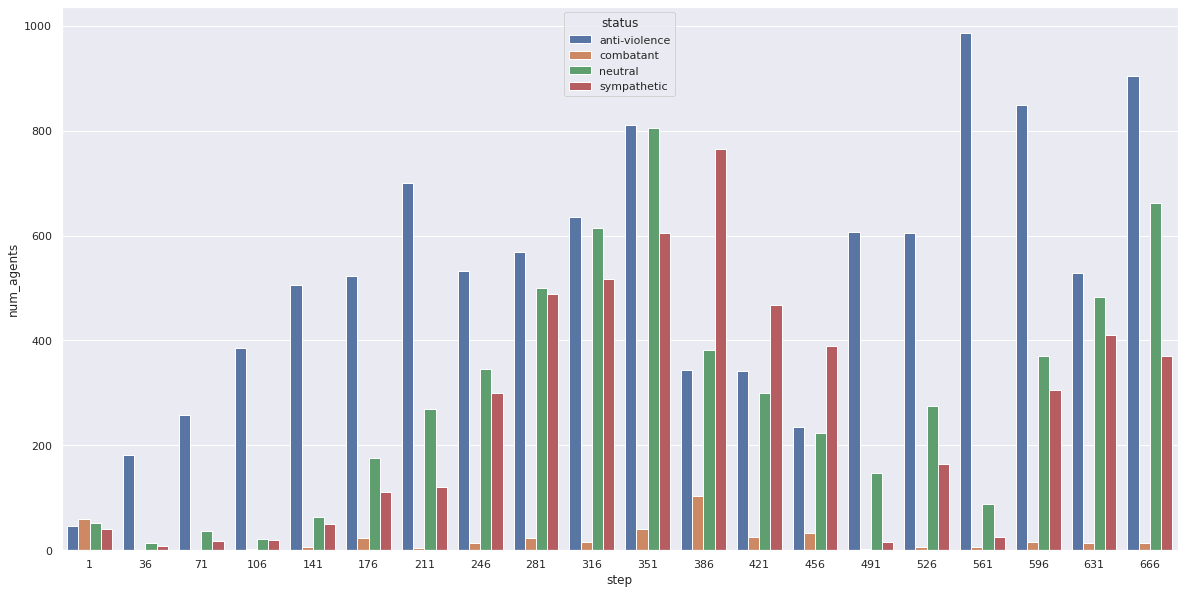

In [27]:
import seaborn as sns
import numpy as np
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))

sns.barplot(x='step',y='num_agents',hue='status',data=palestinian_stati[palestinian_stati.step.isin(range(1,700,round(700*0.05)))])

anti-violence
anti-violence
anti-violence
anti-violence
anti-violence
anti-violence
anti-violence
anti-violence
anti-violence
anti-violence
anti-violence
anti-violence


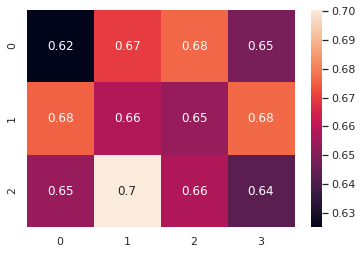

In [38]:
dominant_sentiments = np.zeros((scenario.grid.width, scenario.grid.height))
dominant_sentiments = dominant_sentiments.astype(str)
dominant_sentiments[dominant_sentiments=='0.0'] = 'none'
percent_dominant_sentiments = np.zeros((scenario.grid.width, scenario.grid.height))

for cell in scenario.grid.coord_iter():
    cell_content, x, y = cell
    status_dict = {'anti-violence':0,'NONE':0,'neutral':0,'sympathetic':0,\
        'combatant':0,'TARG-CONC':0,'TARG-REPR':0,'INDISC-CONC':0,'INDISC-REPR':0}
    for agent in cell_content:
        status_dict[agent.status] += 1

    dominant_sentiment =  max(status_dict, key = lambda x: status_dict[x])
    print(dominant_sentiment)
    if len(cell_content) > 0:
        perc_dominant_sentiment = max(status_dict.values())/len(cell_content)
    else:
        perc_dominant_sentiment = 0

    dominant_sentiments[x][y] = dominant_sentiment 
    percent_dominant_sentiments[x][y] = perc_dominant_sentiment  
     
ax = sns.heatmap(percent_dominant_sentiments, annot=True)
plt.show()

In [40]:
dominant_sentiments_df = pd.DataFrame(dominant_sentiments)
dominant_sentiments_df

,0,1,2,3
0,anti-violence,anti-violence,anti-violence,anti-violence
1,anti-violence,anti-violence,anti-violence,anti-violence
2,anti-violence,anti-violence,anti-violence,anti-violence


In [41]:
# code from stackoverflow
vals_to_int = {j:i for i, j in enumerate(pd.unique(dominant_sentiments.ravel()))}
vals_to_int

{'anti-violence': 0}

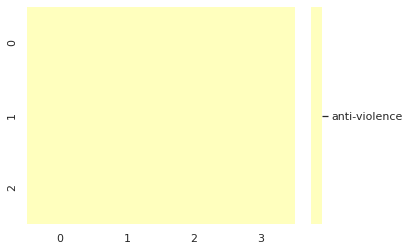

In [42]:
n = len(vals_to_int)
cmap = sns.color_palette('Spectral', n)
ax = sns.heatmap(dominant_sentiments_df.replace(vals_to_int),cmap=cmap)

colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(vals_to_int.keys()))
plt.show()

In [58]:
govt_status = agent_stati[agent_stati.status.isin(['NONE','INDISC-REPR','INDISC-CONC','TARG-CONC','TARG-REPR'])]
govt_status.drop('num_agents', axis=1,inplace=True)
govt_status = govt_status.sort_values('step',ascending=True)
govt_status

/home/npodpx/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,step_cat,status,step
0,1,TARG-CONC,1
529,2,INDISC-CONC,2
1074,3,NONE,3
1611,4,NONE,4
1669,5,NONE,5
...,...,...,...
1591,396,NONE,396
1596,397,TARG-CONC,397
1601,398,INDISC-REPR,398
1606,399,NONE,399


In [59]:
govt_status_cum = govt_status.groupby(['status']).cumcount()
govt_status_cum = govt_status_cum.rename('cumulative_actions')
govt_status_cum = govt_status.join(govt_status_cum)
govt_status_cum.head(10)

,step_cat,status,step,cumulative_actions
0,1,TARG-CONC,1,0
529,2,INDISC-CONC,2,0
1074,3,NONE,3,0
1611,4,NONE,4,1
1669,5,NONE,5,2
1720,6,NONE,6,3
1770,7,NONE,7,4
1821,8,INDISC-REPR,8,0
1872,9,NONE,9,5
5,10,TARG-CONC,10,1


<AxesSubplot:xlabel='step', ylabel='cumulative_actions'>

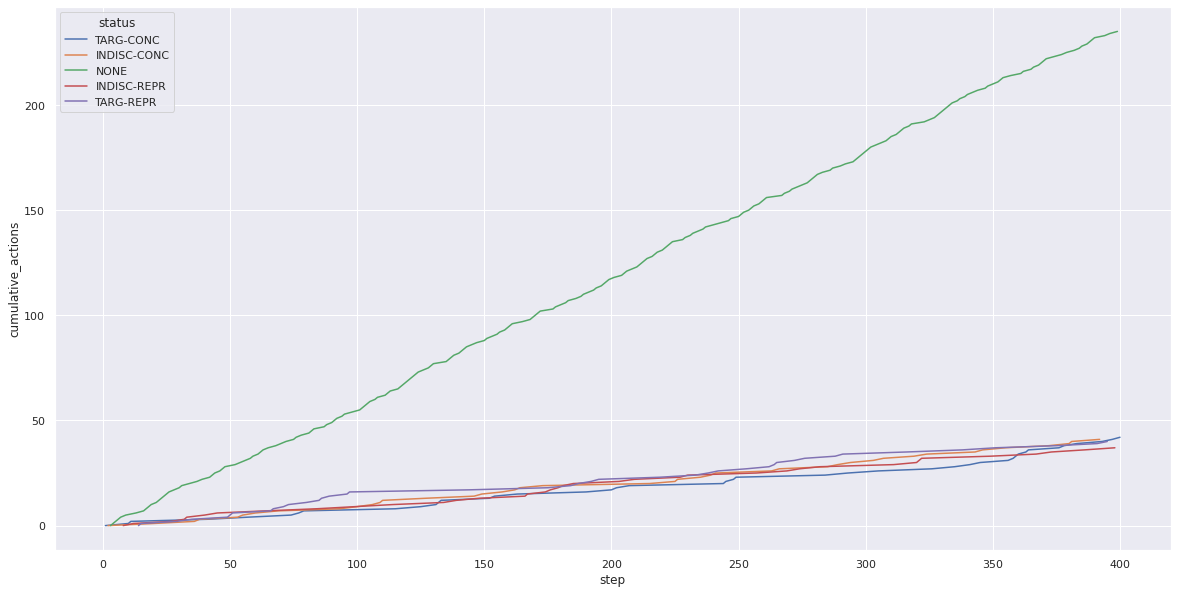

In [60]:
plt.figure(figsize=(20,10))

sns.lineplot(x='step',y='cumulative_actions',hue='status',data=govt_status_cum)

In [21]:
govt_status_cum = pd.get_dummies(govt_status['status']).cumsum()
govt_status_cum

,INDISC-CONC,INDISC-REPR,NONE,TARG-CONC,TARG-REPR
0,0,0,0,0,1
472,0,1,0,0,1
950,0,1,1,0,1
1006,0,2,1,0,1
1059,0,3,1,0,1
...,...,...,...,...,...
932,26,107,40,33,90
936,26,108,40,33,90
941,26,108,41,33,90
946,26,108,42,33,90


In [21]:
scenario.datacollector.get_table_dataframe('Deaths')

,step,deaths
0,1,36
1,2,2
2,3,1
3,4,1
4,5,0
...,...,...
295,296,5
296,297,3
297,298,3
298,299,3
